# Scratch for shicoeff optim

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xgcm
from xmitgcm import open_mdsdataset
import MITgcmutils as mut

from pig_tools import diag_plot
import pig_tools as pt
import genMooringMasks as mm
import plotShiOptimUpdates as pso

In [3]:
# Stuff I use a lot
grid_dir = '/workspace/grids/pig_08'
g = open_mdsdataset(grid_dir,iters=None)
xc=g.XC
yc=g.YC
xg=g.XG
yg=g.YG

/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/grids/pig_08. Using default version.
  "in %s. Using default version." % data_dir)


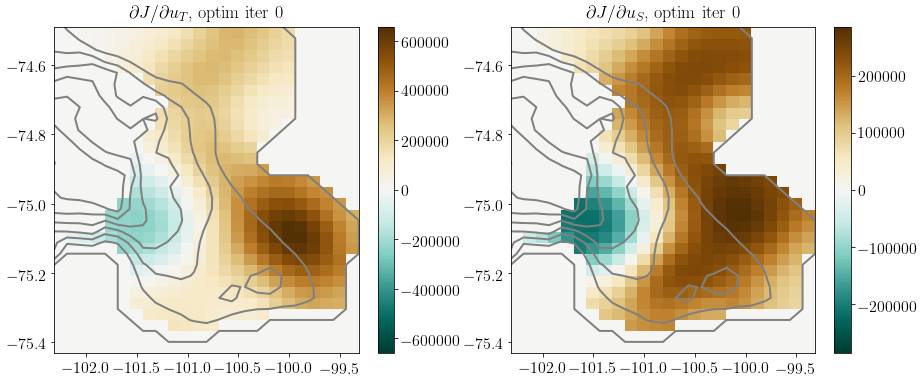

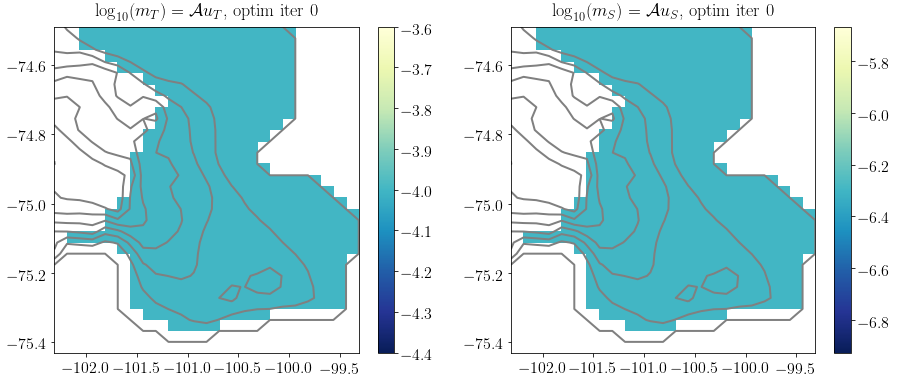

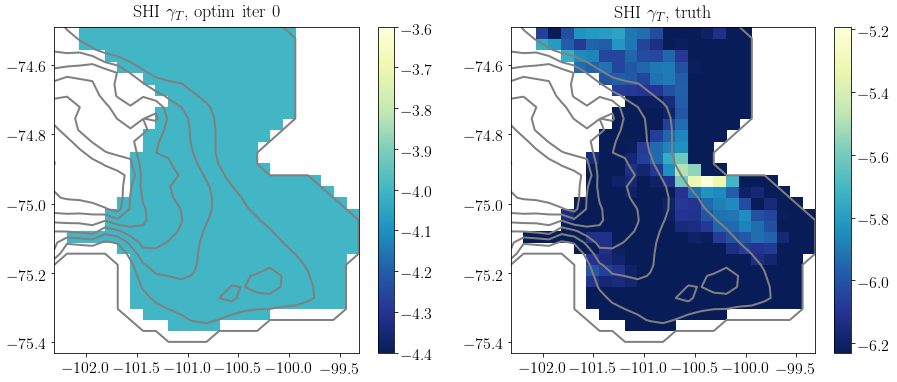

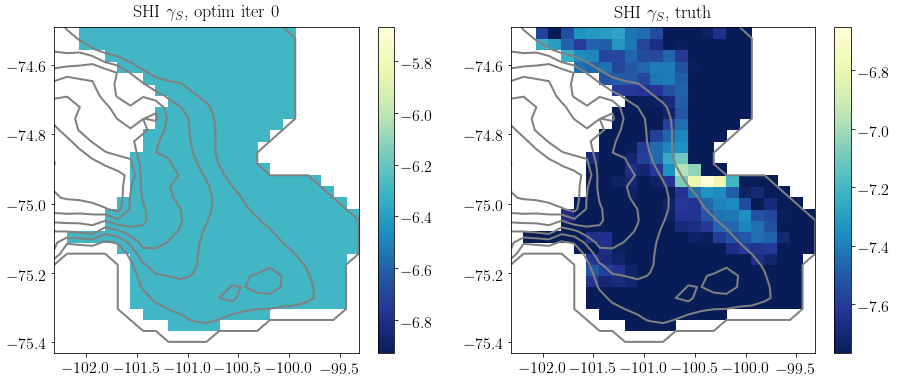

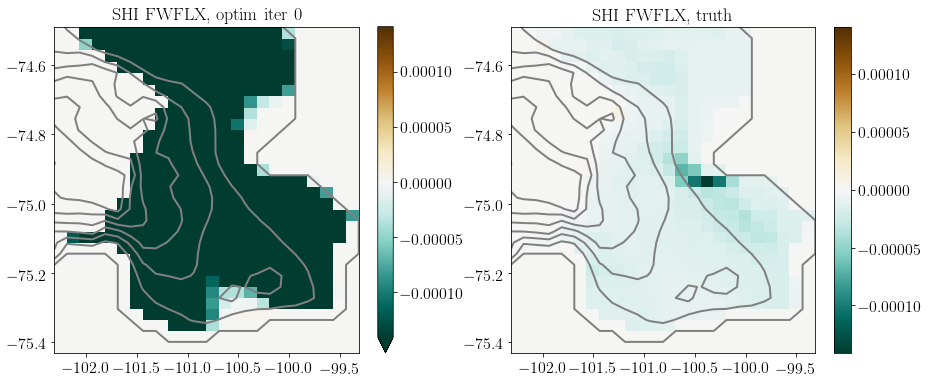

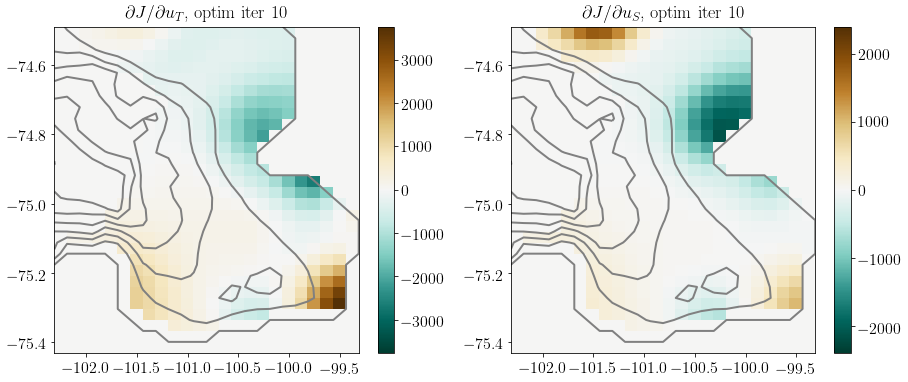

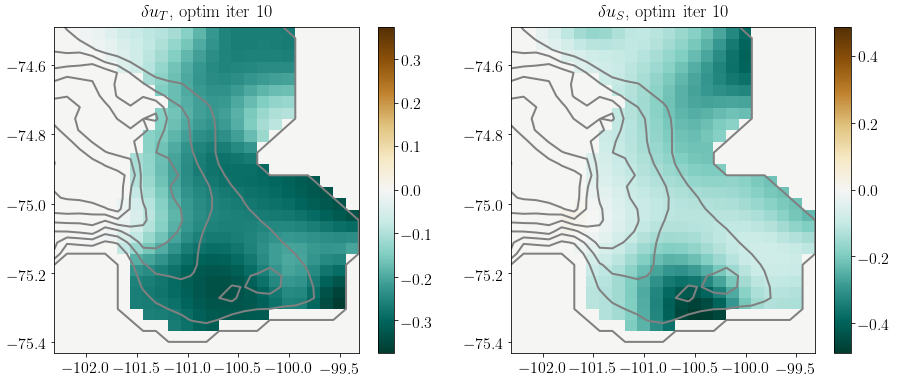

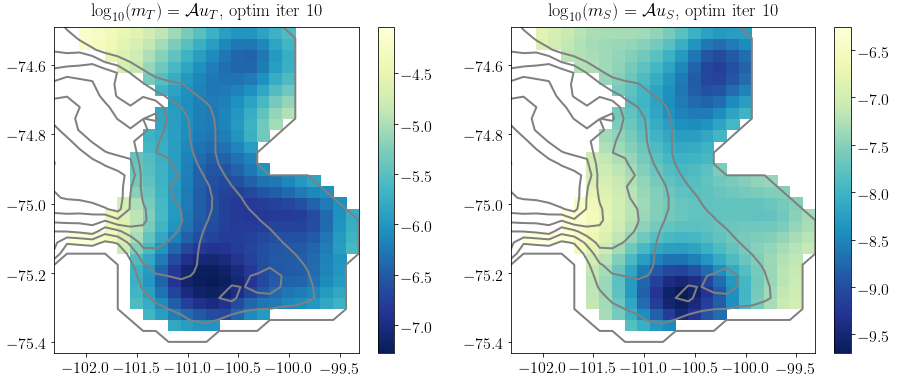

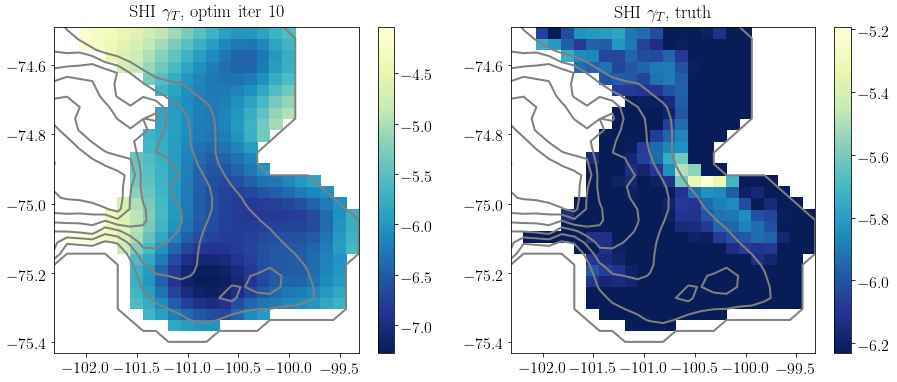

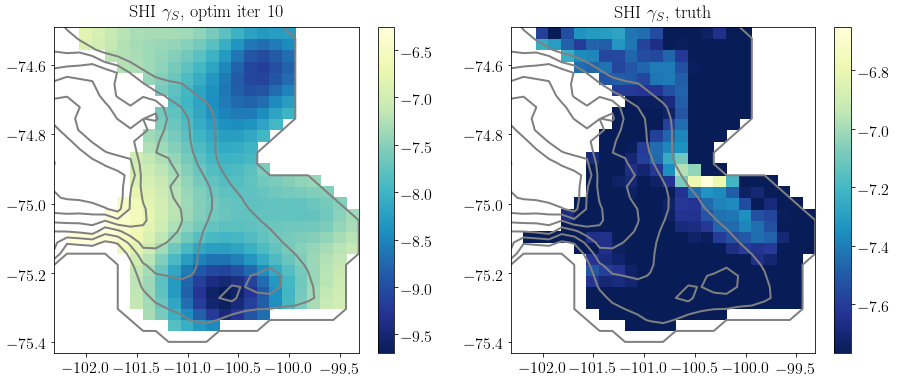

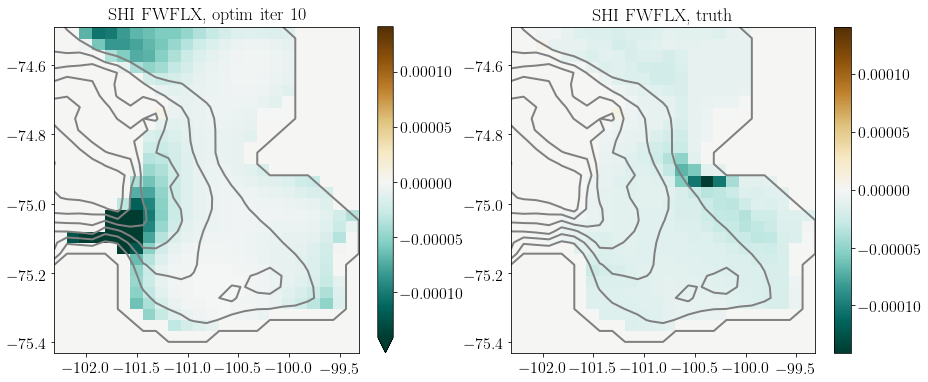

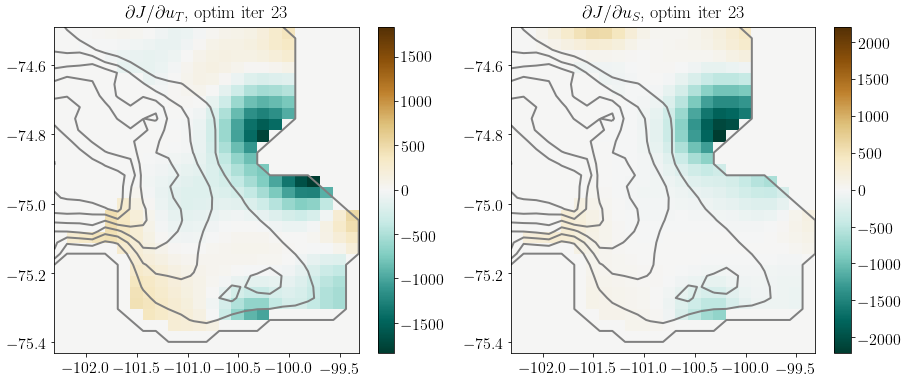

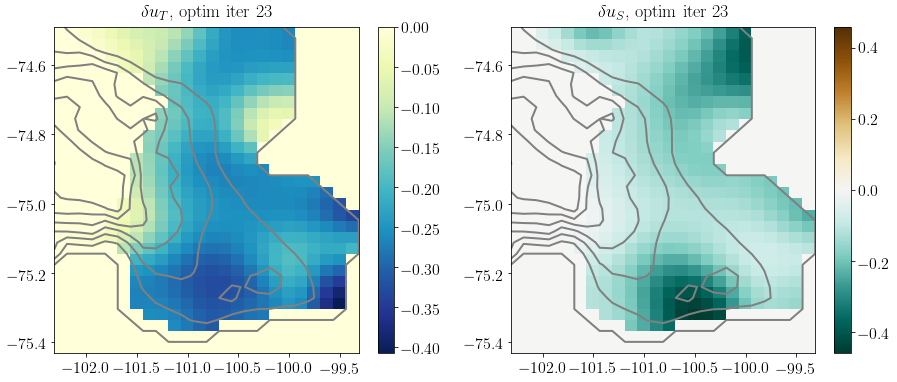

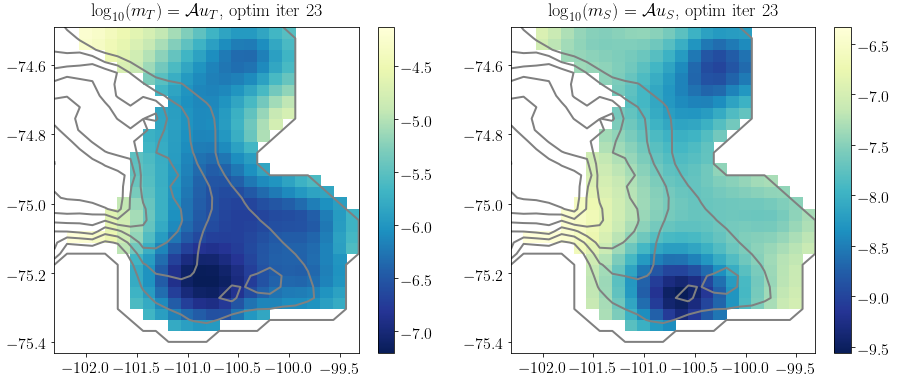

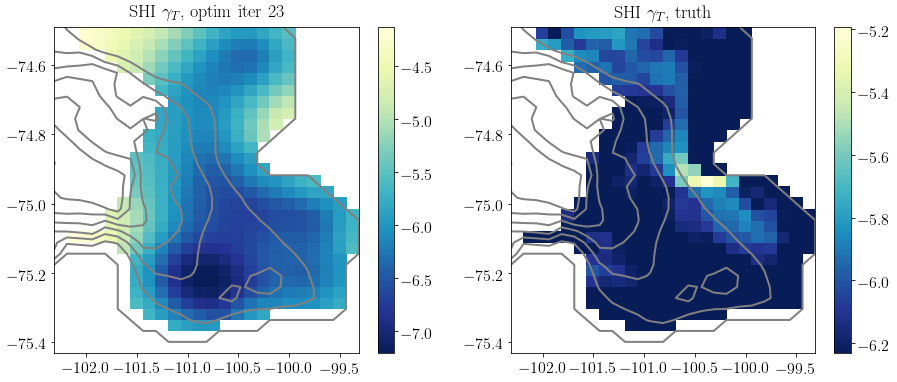

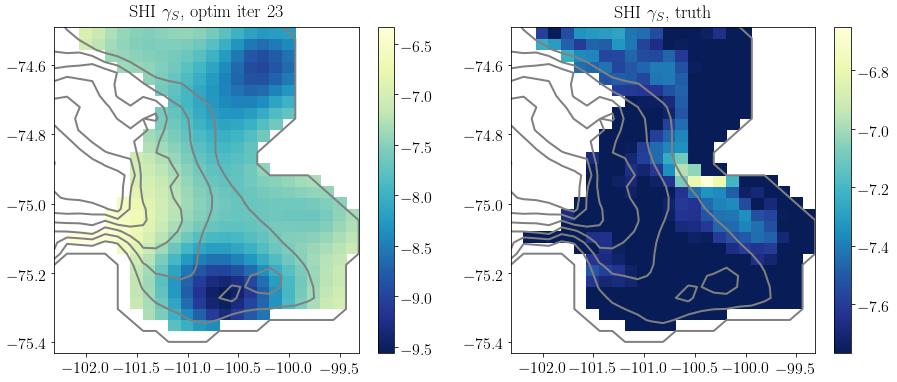

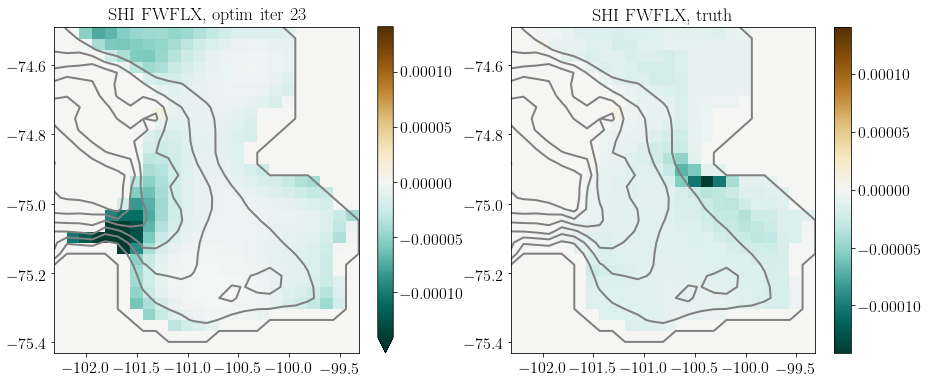

In [9]:
# --- Uncomment these to show how nolog doesn't work...
#run_dir_prefix = '/workspace/ase-adjoint/pig/generic/shicoeff_optim_nolog/run_ad_08'
#weights_shics = mut.rdmds(('%s.01/weights_shics' % run_dir_prefix))
#diag_plot(xc,yc,weights_shics)

run_dir_prefix = '/workspace/ase-adjoint/pig/generic/shicoeff_optim_novel_lastweek/run_ad_08'

pso.plotShiOptimUpdates(run_dir_prefix,0)
pso.plotShiOptimUpdates(run_dir_prefix,10)
pso.plotShiOptimUpdates(run_dir_prefix,23)



/workspace/xmitgcm/xmitgcm/mds_store.py:812: UserWarning: Couldn't find available_diagnostics.log in /workspace/grids/pig_08. Using default version.
  "in %s. Using default version." % data_dir)


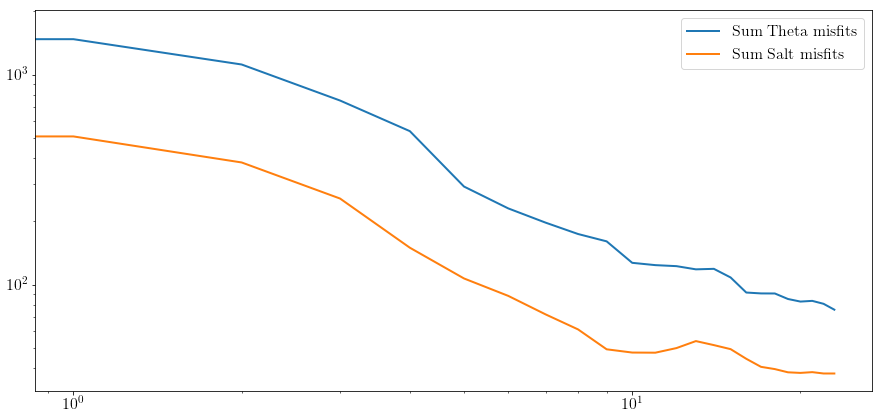

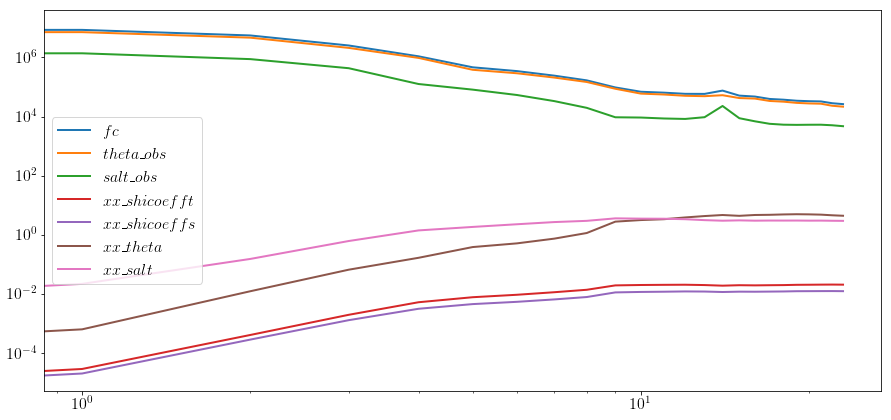

In [10]:
pso.plotAvgMisfits(run_dir_prefix,23)
pso.plotShiCostFunction(run_dir_prefix,23)

In [7]:
oiter=20
run_init_dir = ('%s.00' % run_dir_prefix)
run_dir = ('%s.%02d' % (run_dir_prefix,oiter))
diags_init=('%s/diags' % run_init_dir)
diags_dir=('%s/diags' % run_dir)
truth_dir = '/workspace/results/pig/shicoeff-optim/truth.ustar'
truth_diags=('%s/diags' % truth_dir)

# --- load truth and optim iter run
truth = open_mdsdataset(data_dir=truth_diags,
                        grid_dir=grid_dir
                       )
dso = open_mdsdataset(data_dir=diags_dir,
                      grid_dir=grid_dir
                     )
ds0 = open_mdsdataset(data_dir=diags_init,
                      grid_dir=grid_dir
                     )

xgt = xgcm.Grid(truth,periodic=False)
xgo = xgcm.Grid(dso,periodic=False)
xg0 = xgcm.Grid(ds0,periodic=False)

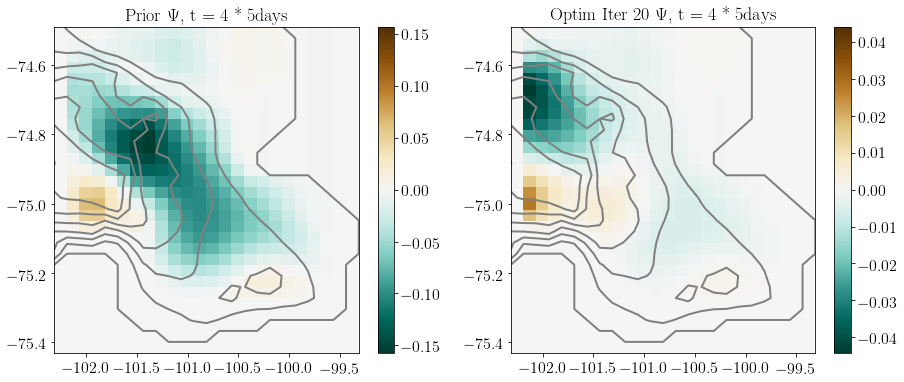

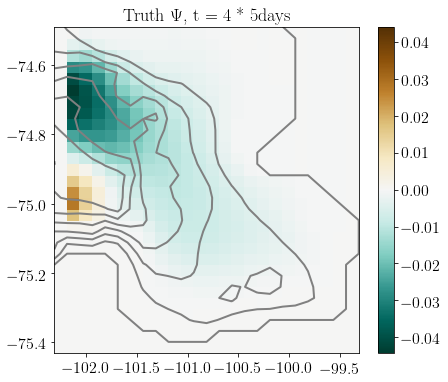

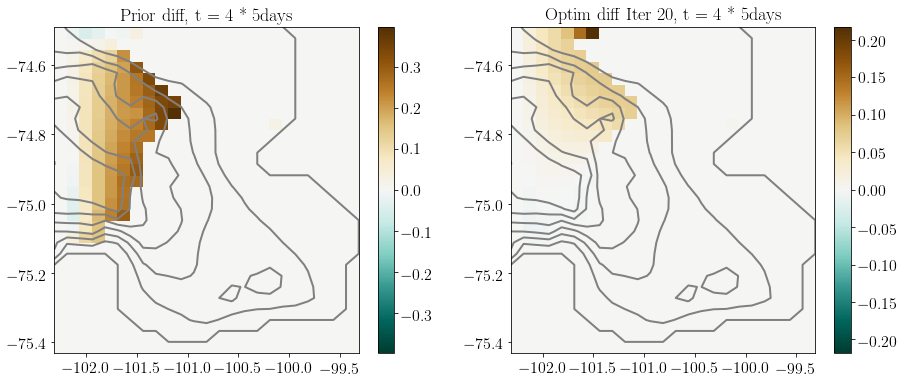

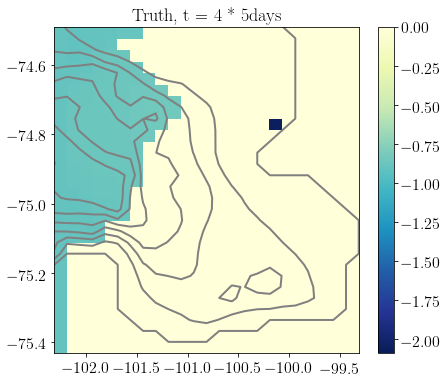

In [8]:
baro_t = pt.calc_baro_stf(xgt,truth)
baro_o = pt.calc_baro_stf(xgo,dso)
baro_0 = pt.calc_baro_stf(xg0,ds0)

tt = 3 
zlev=20
diag_plot(xc,yc,baro_0.isel(time=tt),baro_o.isel(time=tt),
          title1=('Prior $\Psi$, t = %d * 5days' % (tt+1)), 
          title2=('Optim Iter %d $\Psi$, t = %d * 5days' % (oiter,tt+1)),depth=g.Depth)
diag_plot(xc,yc,baro_t.isel(time=tt),title1=('Truth $\Psi$, t = %d * 5days' % (tt+1)),depth=g.Depth)
#diag_plot(xc,yc,ds0['MXLDEPTH'].isel(time=tt),dso['MXLDEPTH'].isel(time=tt),
#          title1=('Prior MXLD, t = %d * 5days' % (tt+1)),
#          title2=('Optim Iter %d MXLD, t = %d * 5days' % (oiter,tt+1)),depth=g.Depth)
#diag_plot(xc,yc,truth['MXLDEPTH'].isel(time=tt),title1=('Truth MXLD, t = %d * 5days' % (tt+1)),depth=g.Depth)

# Initial conditions
zlev=10
fldStr='THETA'
diff0 = ds0[fldStr]-truth[fldStr]
diffo = dso[fldStr]-truth[fldStr]
diag_plot(xc,yc,diff0.isel(time=tt,Z=zlev),diffo.isel(time=tt,Z=zlev),
          title1=('Prior diff, t = %d * 5days' % (tt+1)),
          title2=('Optim diff Iter %d, t = %d * 5days' % (oiter,tt+1)),depth=g.Depth)
diag_plot(xc,yc,truth[fldStr].isel(time=tt,Z=zlev),title1=('Truth, t = %d * 5days' % (tt+1)),depth=g.Depth)

In [ ]:
print(np.sum(dso.dxG.values))
print(3600*25)
print(0.01 / .00014 / 90000)
print(3600*24)

optim = pso.plotFailedUpdates(run_dir_prefix,11)

In [ ]:
for vname in optim:
    if vname.startswith('xx_') and (not vname.endswith('effective')):
        if vname.find('shicoeff') > 0:
            print(vname.replace('_','\_'))
        

In [ ]:
diag_plot(xc,yc,mut.rdmds('/workspace/results/pig/shicoeff-optim/pig_prior_08/weights_salt'))

In [ ]:
misfit_theta = mut.rdmds('/workspace/ase-adjoint/pig/generic/shicoeff_optim_novel_lastweek/run_ad_08.00/misfit_theta_obs')
print(np.shape(misfit_theta))
diag_plot(xc,yc,misfit_theta[0,:,:])

In [ ]:
np.max(np.abs(dso['SHIfwFlx'].isel(time=slice(-1,-3,-1)).mean('time').values))
plt.figure()
plt.pcolormesh(xc,yc,dso['SHIfwFlx'].mean('time'))
plt.colorbar(extend='min')
plt.show()